# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from utils import get_dataset

%matplotlib inline

In [2]:
dataset = get_dataset("data/waymo/training_and_validation/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(frame):
    """
    This function takes a frame from the dataset and displays the image with 
    the associated bounding boxes.
    """
    # for each label type, assign a bounding box color
    label_colors = {
        1: "r",  # vehicles
        2: "b",  # pedestrians
        4: "g"  # cyclists
    }

    # get image as a numpy array and compute width and height
    np_img = frame["image"].numpy()
    w, h = np_img.shape[0], np_img.shape[1]
    # show the image
    fig, ax = plt.subplots()
    ax.imshow(np_img)
    # draw the ground-truth bounding boxes
    for label, bbox in zip(frame["groundtruth_classes"], frame["groundtruth_boxes"]):
        label_color = label_colors[label.numpy()]
        # Create a Rectangle patch
        bbox = np.multiply(bbox.numpy(), np.array([h, w, h, w]))
        ymin, xmin, ymax, xmax = bbox
        bbox_width = (xmax - xmin)
        bbox_height = (ymax - ymin)
        rect = patches.Rectangle((xmin, ymin), bbox_width, bbox_height,
                                 linewidth=1, edgecolor=label_color, facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

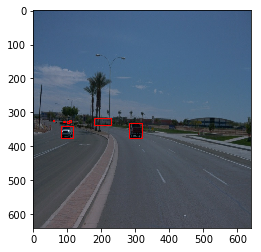

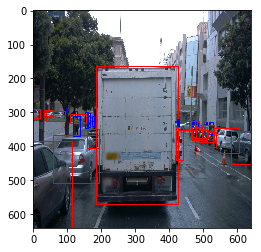

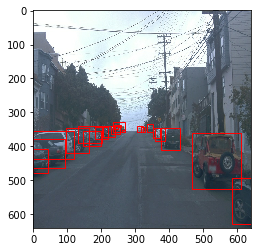

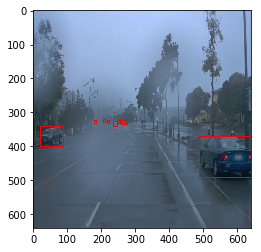

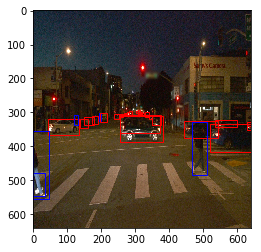

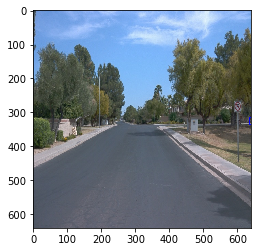

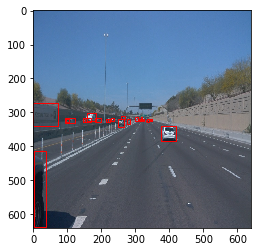

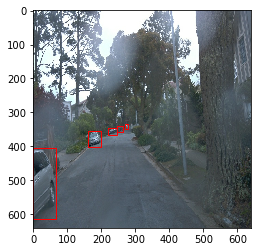

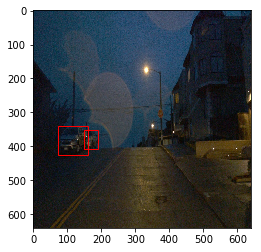

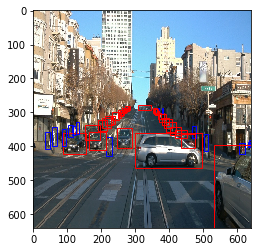

In [5]:
for frame in dataset.shuffle(1000, reshuffle_each_iteration=True).take(10):
    display_instances(frame)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

Label statistics (for a random sampling of 1000 images in the dataset):

Average number of labels per image (any label): 23.31
Average number of 'vehicle' labels per image: 17.986
Average number of 'pedestrian' labels per image: 5.18
Average number of 'cyclist' labels per image: 0.144

Distribution of labels in dataset:


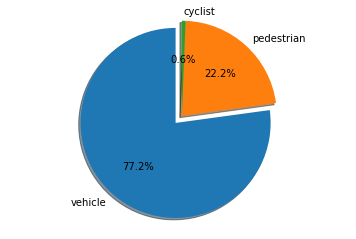


Histograms for number of occurences of each label type per image:


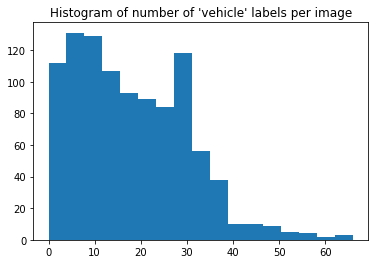

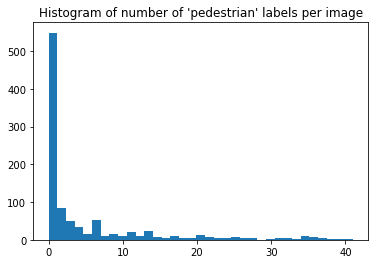

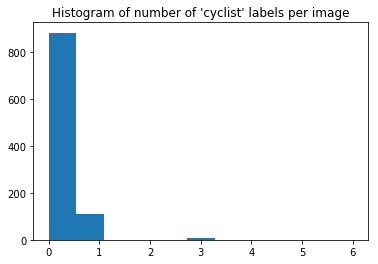

In [6]:
# We can get a rough estimate of the distribution of labels by taking a random sampling of the dataset
# and computing label statistics. As N increases, this becomes a more and more accurate statistics of
# the dataset.
N = 1000
labels = [] # list of lists, consisting of a list of labels for each image
for frame in dataset.shuffle(N, reshuffle_each_iteration=True).take(N):
    labels.append([])
    for label in frame["groundtruth_classes"]:
        labels[-1].append(label.numpy())

label_map = {1: "vehicle", 2: "pedestrian", 4: "cyclist"}

print("Label statistics (for a random sampling of {} images in the dataset):\n".format(N))

# Compute and print the total number of labels, and totals for each label type
num_labels = sum([len(l) for l in labels])
print("Average number of labels per image (any label): {}".format(num_labels / N))

# create a dict where the key is label value (e.g. 1), and the value is how
# many of those labels exist in the dataset
label_totals = {}
for label_val in label_map.keys():
    label_totals[label_val] = sum([c.count(label_val) for c in labels])

for label_val, label_str in label_map.items():
    print("Average number of '{}' labels per image: {}".format(
        label_str, label_totals[label_val] / N))

# Show pie chart of label distribution
print("\nDistribution of labels in dataset:")
fig1, ax1 = plt.subplots()
# explode the 'vehicles' slice, since it is typically largest
explode = (0.1, 0, 0)
ax1.pie(label_totals.values(), explode=explode, labels=label_map.values(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Show histogram of number of instances of each label per image
print("\nHistograms for number of occurences of each label type per image:")
for label_val, label_str in label_map.items():
    plt.title("Histogram of number of '{}' labels per image".format(label_str))
    this_label = [c.count(label_val) for c in labels]
    plt.hist(this_label, bins='auto')
    plt.show()